# Problem statement:
The objective of this project is to predict the prices of flight tickets accurately. This prediction can benefit both airlines and passengers by providing insights into ticket pricing trends.



# Varaibles in the Dataset:
* 'Flight_ID': Identifier for each flight.
* 'Airline': The airline associated with the flight (categorical)
* 'Departure_City': The city where the flight departs from.
* 'Arrival_City': The city where the flight arrives.
* 'Distance': The distance of the flight
* 'Departure_Time': The time of departure (datetime)
* 'Arrival_Time': The time of arrival (datetime)
* 'Duration': The duration of the flight
* 'Aircraft_Type': The type of aircraft (categorical)
* 'Number_of_Stops': The number of stops during the flight
* 'Day_of_Week': The day of the week of the flight (categorical)
* 'Month_of_Travel': The month of travel (categorical)
* 'Holiday_Season': Whether it's a holiday season (categorical)
* 'Demand': Demand level for the flight (categorical)
* 'Weather_Conditions': Weather conditions during the flight (categorical)
* 'Passenger_Count': The number of passengers on the flight
* 'Promotion_Type': The type of promotion (categorical)
* 'Fuel_Price': The price of fuel
* 'Flight_Price': The target variable we want to predict (flight ticket price)




#Importing All Necessary Libraries

In [37]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

In [38]:
#Reading csv file
df = pd.read_csv("train-2.csv")
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


In [39]:
df.shape

(45000, 19)

In [40]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

# Checking and Handling Missing Values

In [41]:
# looking for the amount of null data in the given data
df.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [42]:
#looking for the percentage of missing values in the given data
pd.DataFrame(df.isna().mean()*100).T

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,0.0,7.94,0.755556,0.413333,0.202222,0.0,0.0,0.0,0.095556,0.0,0.5,0.593333,0.0,0.704444,0.671111,0.0,0.895556,0.2,0.0


1. Column "Airline" is categorical so we can impute values using mode.
2. Column "Aircraft_Type" is categorical so we can impute values using mode.
3. Column "Day_of_Week" is categorical so we can impute values using mode.
4. Column "Month_of_Travel" is categorical so we can impute values using mode.
5. Column "Demand" is categorical so we can impute values using mode.  
6. Column "Weather_Conditions" is categorical so we can impute values using mode.
7. Column "Promotion_Type" is categorical so we can impute values using mode.




In [43]:
print(st.mode(df['Airline']))
print(st.mode(df['Departure_City']))
print(st.mode(df['Arrival_City']))
print(st.mode(df['Aircraft_Type']))
print(st.mode(df['Day_of_Week']))
print(st.mode(df['Month_of_Travel']))
print(st.mode(df['Demand']))
print(st.mode(df['Weather_Conditions']))
print(st.mode(df['Promotion_Type']))

Airline A
nan
nan
Airbus A320
Sunday
January
Low
Cloudy
Special Offer


# Imputing Null Values for Categorical Column Using Mode

In [44]:
df = df.fillna({"Airline":st.mode(df['Airline'])})
df = df.fillna({"Aircraft_Type":st.mode(df['Aircraft_Type'])})
df = df.fillna({"Day_of_Week":st.mode(df['Day_of_Week'])})
df = df.fillna({"Month_of_Travel":st.mode(df['Month_of_Travel'])})
df = df.fillna({"Demand":st.mode(df['Demand'])})
df = df.fillna({"Weather_Conditions":st.mode(df['Weather_Conditions'])})
df = df.fillna({"Promotion_Type":st.mode(df['Promotion_Type'])})

In [45]:
df.isnull().sum()

Flight_ID               0
Airline                 0
Departure_City        340
Arrival_City          186
Distance               91
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           0
Number_of_Stops         0
Day_of_Week             0
Month_of_Travel         0
Holiday_Season          0
Demand                  0
Weather_Conditions      0
Passenger_Count         0
Promotion_Type          0
Fuel_Price             90
Flight_Price            0
dtype: int64

In [46]:
df['Departure_City'].value_counts()

Port Michael         49
West Michael         47
North Michael        42
South Michael        40
North David          39
                     ..
Bettyton              1
Medinashire           1
East Loriview         1
Lake Nicholasfurt     1
East Patriciafurt     1
Name: Departure_City, Length: 23187, dtype: int64

In [47]:
df['Arrival_City'].value_counts()

North Michael       49
Port Michael        47
Lake Michael        42
South David         35
Michaelmouth        35
                    ..
Summerland           1
North Lindafurt      1
West Waynetown       1
North Keithmouth     1
Gabrielville         1
Name: Arrival_City, Length: 23479, dtype: int64

In [48]:
df['Departure_City'] = df['Departure_City'].fillna("Port Michael")
df['Arrival_City'] = df['Arrival_City'].fillna("North Michael")

# Detecting Outliers


In [49]:
df.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


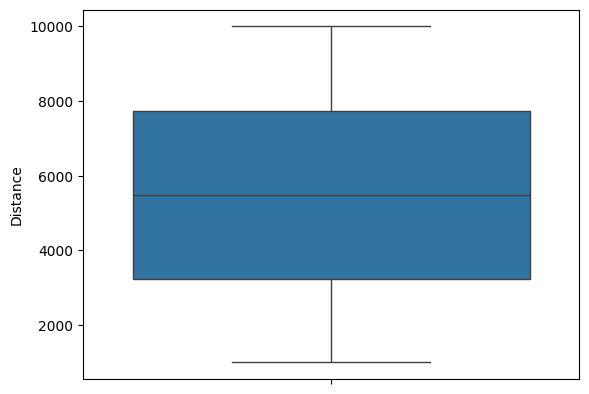

In [50]:
#detecting outliers for column "Distance" and "Fuel_Price" to impute mean or median values
sns.boxplot(df['Distance'])
plt.show()

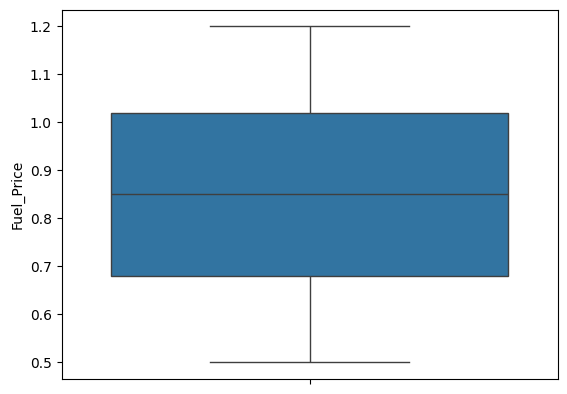

In [51]:
sns.boxplot(df['Fuel_Price'])
plt.show()

As per the data description and boxplot there is no outliers in the column "Distance" and "Fuel_Price" so we can impute mean value for both the columns.

In [52]:
print(df['Distance'].mean())
print(df['Fuel_Price'].mean())

5482.238727203901
0.8501919394344245


In [53]:
df['Distance'] = df['Distance'].fillna(df['Distance'].mean())
df['Fuel_Price'] = df['Fuel_Price'].fillna(df['Fuel_Price'].mean())

In [54]:
df.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In "Departure_City" and "Arrival_City" the mode value is nan so we can impute second mode value.

So there is no missing values all the missing values were treated using Mode for categorical columns and mean for numerical columns.

# DataType Correction

In [55]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

Column "Departure_Time" and "Arrival_Time" is given as object have to convert to datetime.

In [56]:
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [57]:
df.dtypes

Flight_ID                     object
Airline                       object
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type                 object
Number_of_Stops                int64
Day_of_Week                   object
Month_of_Travel               object
Holiday_Season                object
Demand                        object
Weather_Conditions            object
Passenger_Count                int64
Promotion_Type                object
Fuel_Price                   float64
Flight_Price                 float64
dtype: object

Column "Departure_Time" and "Arrival_Time" is converted from object to datetime.
Now All columns are in the right format of datatype.

Here the "Departure_Time" and "Arrival_Time" column is going to split into 10 columns by Hour,Minute,Year,Month,Day

In [58]:
df['Departure_Year'] = df['Departure_Time'].dt.year
df['Departure_Month'] = df['Departure_Time'].dt.month
df['Departure_Day'] = df['Departure_Time'].dt.day
df['Departure_Hours'] = df['Departure_Time'].dt.hour
df['Departure_Minute'] = df['Departure_Time'].dt.minute
df['Arrival_Year'] = df['Arrival_Time'].dt.year
df['Arrival_Month'] = df['Arrival_Time'].dt.month
df['Arrival_Day'] = df['Arrival_Time'].dt.day
df['Arrival_Hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [59]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price', 'Departure_Year', 'Departure_Month',
       'Departure_Day', 'Departure_Hours', 'Departure_Minute', 'Arrival_Year',
       'Arrival_Month', 'Arrival_Day', 'Arrival_Hours', 'Arrival_Minute'],
      dtype='object')

In [60]:
#Checking how many columns in the dataframe are continuos and categorical values:
pd.DataFrame(df.dtypes.value_counts()).T

,int64,object,float64,datetime64[ns]
0,12,11,4,2


# Object Data Columns

In [61]:
object_data_cols = [i for i in df.columns if df[i].dtype == 'object']
object_data_cols

['Flight_ID',
 'Airline',
 'Departure_City',
 'Arrival_City',
 'Aircraft_Type',
 'Day_of_Week',
 'Month_of_Travel',
 'Holiday_Season',
 'Demand',
 'Weather_Conditions',
 'Promotion_Type']

# Float Data Columns

In [62]:
float_data_cols = [i for i in df.columns if df[i].dtypes == "float64"]
float_data_cols

['Distance', 'Duration', 'Fuel_Price', 'Flight_Price']

# Integer Data Columns

In [63]:
int_data_cols = [i for i in df.columns if df[i].dtypes == "int64"]
int_data_cols

['Number_of_Stops',
 'Passenger_Count',
 'Departure_Year',
 'Departure_Month',
 'Departure_Day',
 'Departure_Hours',
 'Departure_Minute',
 'Arrival_Year',
 'Arrival_Month',
 'Arrival_Day',
 'Arrival_Hours',
 'Arrival_Minute']

# Datatime Data Columns

In [64]:
datetime_data_cols = [i for i in df.columns if df[i].dtypes == "datetime64[ns]"]
datetime_data_cols

['Departure_Time', 'Arrival_Time']

Deleting the columns "Departure_Time" and "Arrival_Time" as the 2 columns splitted into 10 columns

In [65]:
del df['Departure_Time']
del df['Arrival_Time']

In [66]:
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Duration', 'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Holiday_Season', 'Demand', 'Weather_Conditions',
       'Passenger_Count', 'Promotion_Type', 'Fuel_Price', 'Flight_Price',
       'Departure_Year', 'Departure_Month', 'Departure_Day', 'Departure_Hours',
       'Departure_Minute', 'Arrival_Year', 'Arrival_Month', 'Arrival_Day',
       'Arrival_Hours', 'Arrival_Minute'],
      dtype='object')

# Checking Spelling Mistakes
Checking value counts in categorical column for spelling mistakes

In [67]:
df['Airline'].value_counts()

Airline A    17436
Airline C    13809
Airline B    13755
Name: Airline, dtype: int64

In [68]:
df['Aircraft_Type'].value_counts()

Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: Aircraft_Type, dtype: int64

In [69]:
df['Day_of_Week'].value_counts()

Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: Day_of_Week, dtype: int64

In [70]:
df['Month_of_Travel'].value_counts()

January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: Month_of_Travel, dtype: int64

In [71]:
df['Demand'].value_counts()

Low       29263
Medium     8954
High       6783
Name: Demand, dtype: int64

In [72]:
df['Weather_Conditions'].value_counts()

Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: Weather_Conditions, dtype: int64

In [73]:
df['Holiday_Season'].value_counts()

Spring    9036
None      9020
Fall      9010
Summer    8970
Winter    8964
Name: Holiday_Season, dtype: int64

In [74]:
df['Promotion_Type'].value_counts()

Special Offer    15299
Discount         14889
None             14812
Name: Promotion_Type, dtype: int64

In [75]:
df['Departure_City'].value_counts()

Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: Departure_City, Length: 23187, dtype: int64

In [76]:
df['Arrival_City'].value_counts()

North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: Arrival_City, Length: 23479, dtype: int64

1. In column "Airline" there are 3 unique values.
2. In column "Aircraft_Type" there are 5 unique values
3. In column "Day_of_Week" there are 7 unique values
4. In column "Month_of_Travel" there are 12 unique values
5. In column "Demand" there are 3 unique values
6. In column "Weather_Conditions" there are 4 unique values
7. In column "Promotion_Type" there are 3 unique values
8. In column "Holiday_Season" there are 5 unique values.
9. There is no spelling mistakes in the above 8 columns
10. In column "Departure_City" and "Arrival_City" there are lot of unique values.

# Checking for Duplicates

In [77]:
df = df.drop_duplicates()

In [78]:
df.shape

(45000, 27)

There is no Duplicate in the given data

In [79]:
# column "Flight_ID" is not mandatory column so we can drop or delete the column
del df['Flight_ID']

In [80]:
df.shape

(45000, 26)

In [81]:
df.head()

,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,...,Departure_Year,Departure_Month,Departure_Day,Departure_Hours,Departure_Minute,Arrival_Year,Arrival_Month,Arrival_Day,Arrival_Hours,Arrival_Minute
0,Airline B,Port Michael,Greenshire,8286.0,11.94,Boeing 787,0,Wednesday,December,Summer,...,2024,1,25,8,23,2024,1,25,20,19
1,Airline C,Leonardland,New Stephen,2942.0,5.29,Airbus A320,0,Wednesday,March,Spring,...,2024,1,25,20,28,2024,1,25,1,45
2,Airline B,South Dylanville,Port Ambermouth,2468.0,4.41,Boeing 787,1,Sunday,September,Summer,...,2024,1,25,11,30,2024,1,25,15,54
3,Airline A,Blakefort,Crosbyberg,3145.0,4.96,Boeing 787,0,Sunday,February,Fall,...,2024,1,25,20,24,2024,1,25,1,21
4,Airline B,Michaelport,Onealborough,5558.0,8.09,Boeing 737,1,Thursday,January,None,...,2024,1,25,21,59,2024,1,25,6,4


So there are 45000 rows and 27 columns as of now

# Data Visualization

Text(0.5, 1.0, ' High Promotion Type')

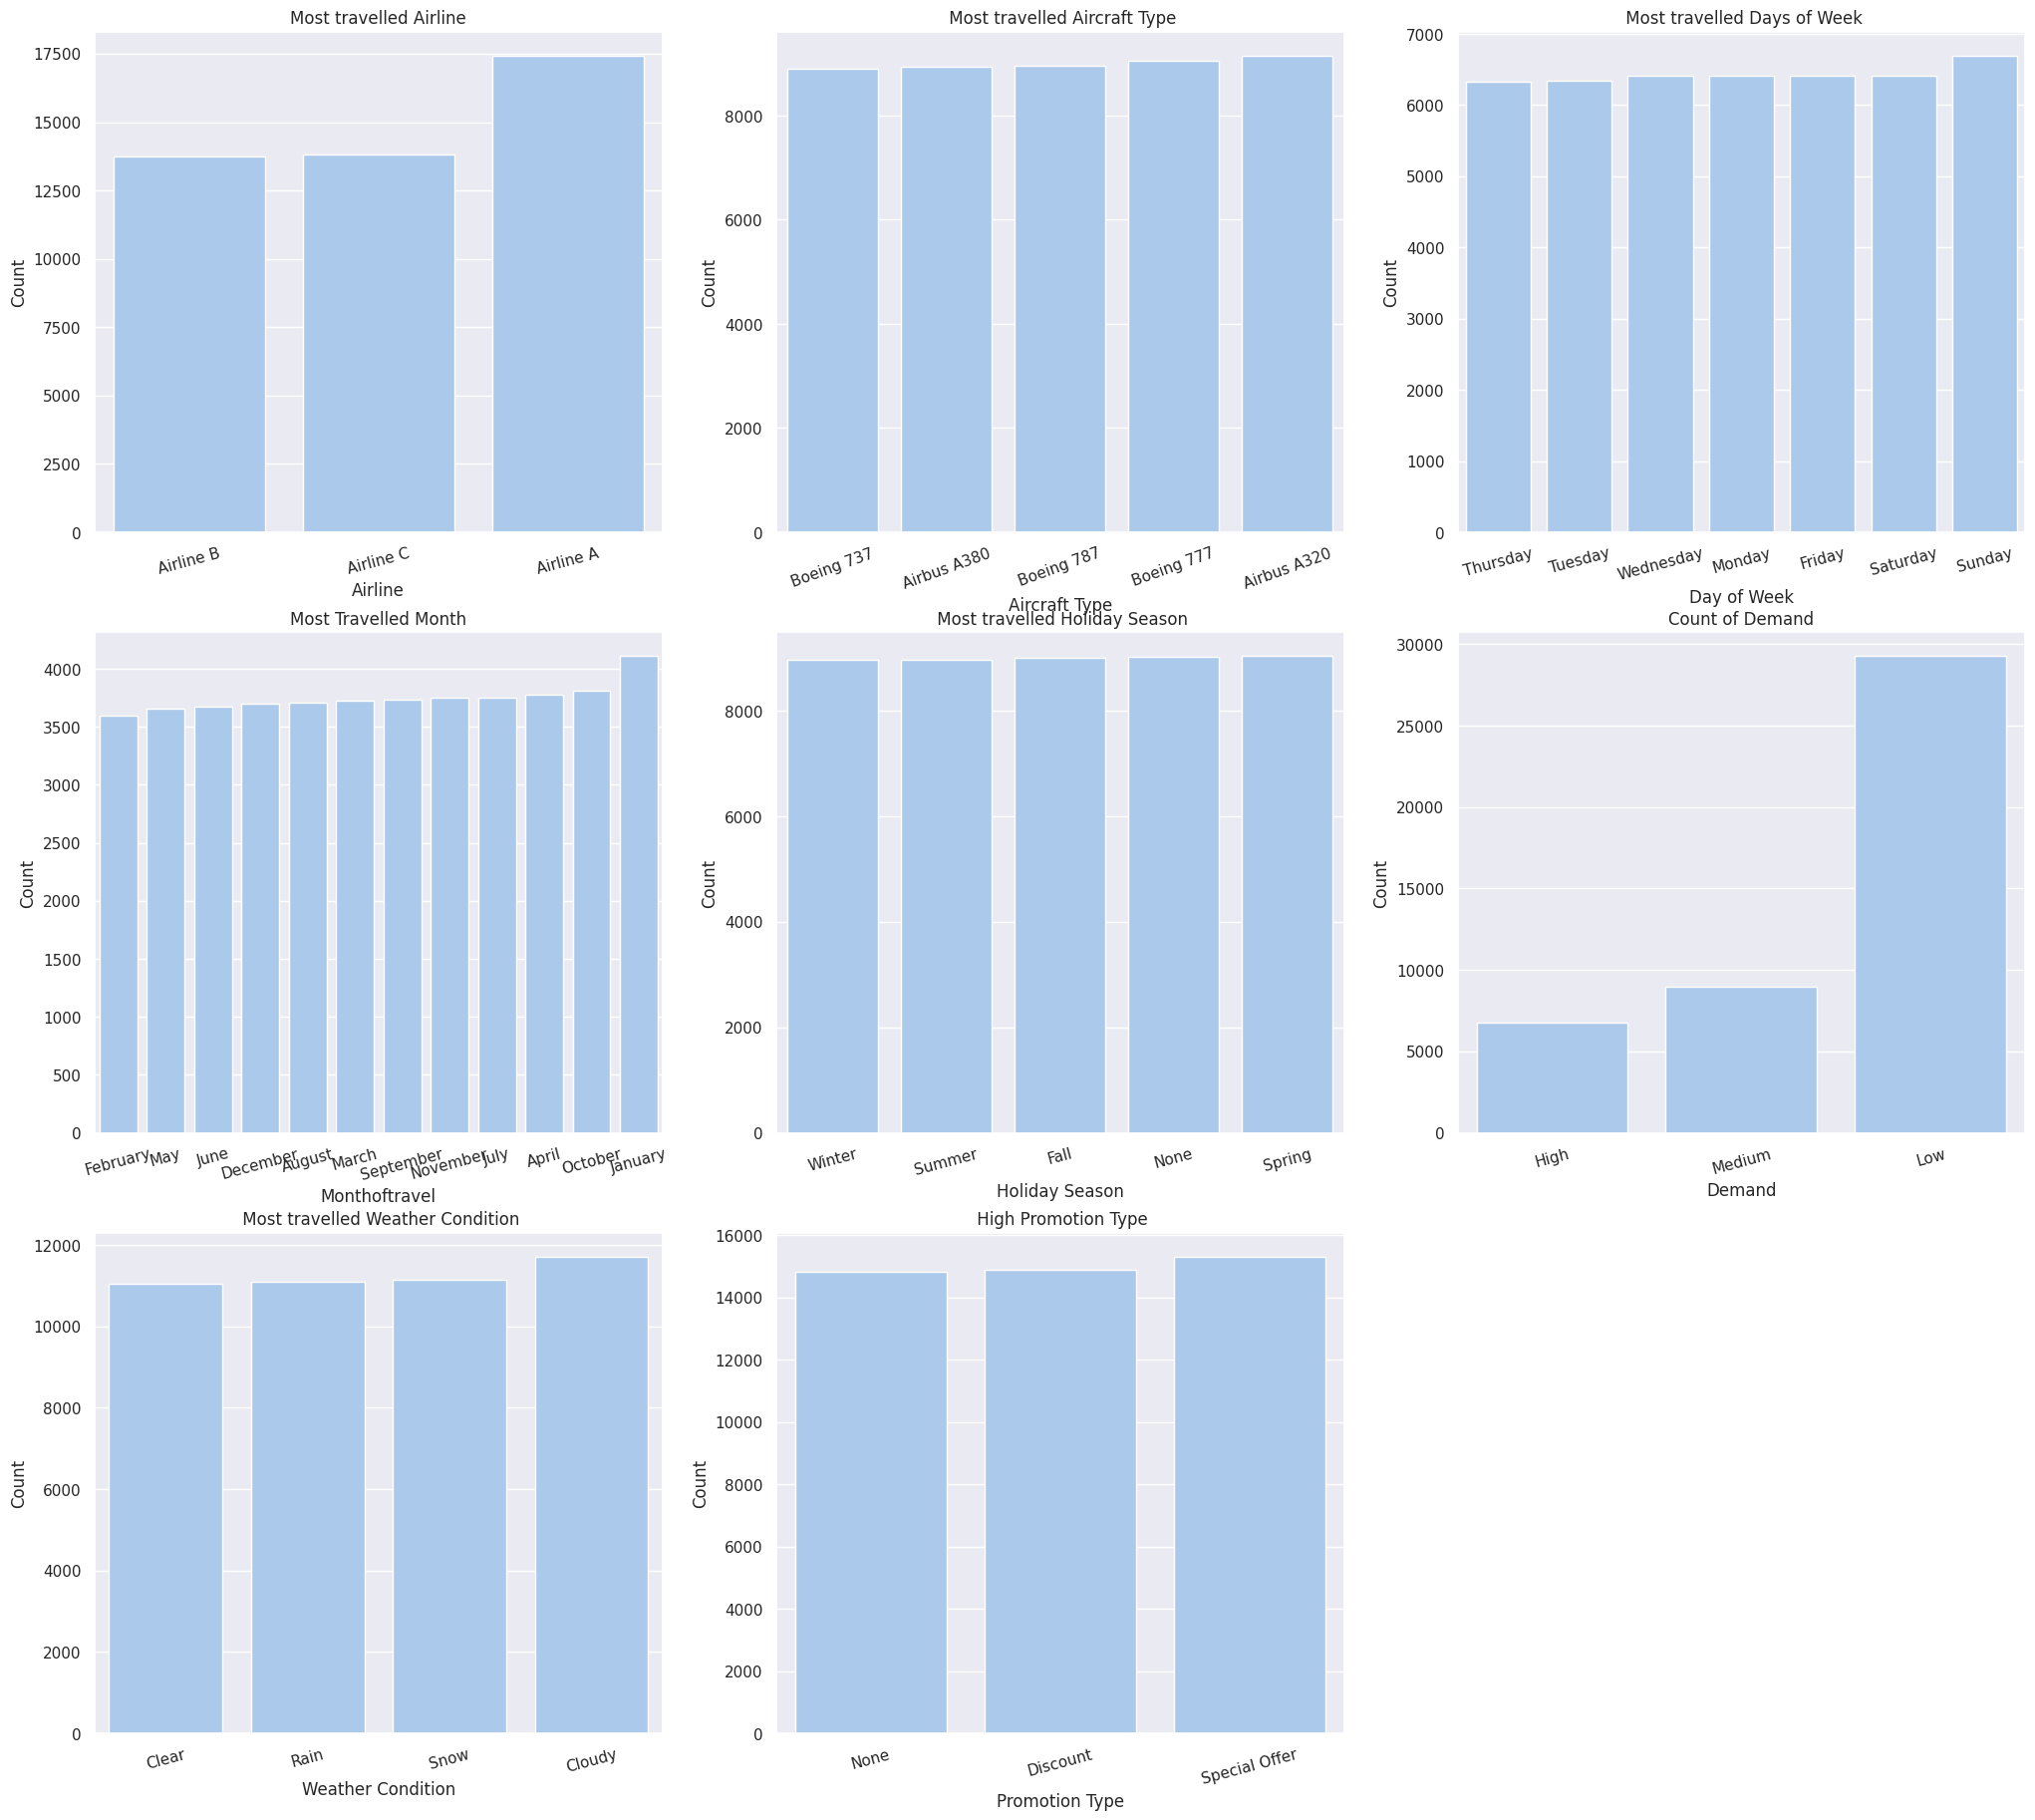

In [82]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(25,30))
plt.subplot(431)
sns.countplot(data=df,x='Airline',order=df['Airline'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Most travelled Airline')

plt.subplot(432)
sns.countplot(data=df,x='Aircraft_Type',order = df['Aircraft_Type'].value_counts().index[::-1])
plt.xticks(rotation=20)
plt.xlabel("Aircraft Type")
plt.ylabel("Count")
plt.title(" Most travelled Aircraft Type")

plt.subplot(433)
sns.countplot(data=df,x='Day_of_Week',order = df['Day_of_Week'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title(" Most travelled Days of Week")

plt.subplot(434)
sns.countplot(data=df,x='Month_of_Travel',order=df['Month_of_Travel'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Monthoftravel')
plt.ylabel('Count')
plt.title('Most Travelled Month')

plt.subplot(435)
sns.countplot(data=df,x='Holiday_Season',order = df['Holiday_Season'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("Holiday Season")
plt.ylabel("Count")
plt.title(" Most travelled Holiday Season")

plt.subplot(436)
sns.countplot(data=df,x='Demand',order=df['Demand'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Demand')
plt.ylabel('Count')
plt.title('Count of Demand')

plt.subplot(437)
sns.countplot(data=df,x='Weather_Conditions',order = df['Weather_Conditions'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.title(" Most travelled Weather Condition")

plt.subplot(438)
sns.countplot(data=df,x='Promotion_Type',order = df['Promotion_Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("Promotion Type")
plt.ylabel("Count")
plt.title(" High Promotion Type")


Interpretations:
1. According to column "Airline" Airline A is travelled most.
2. According to column "Aircraft_Type" all the aircrafts were equally travelled.
3. According to column "Day_of_Week" Sunday is travelled most.
4. According to column "Month_of_Travel" January month is travelled most.
5. According to column  "Holiday_Season" during all the seasons were equally travelled.
6. According to column "Demand" the count of Low demand is high.
7. According to column "Weather_Conditions" during Cloudy travelled most.
8. According to column "Promotion_Type" the count of  Special offer is high.


Plotting barplots for categorical column vs mean Flight Price

In [83]:
#Orders for all the barplots in ascending order:
airline_order = df.groupby('Airline')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Airline']
aircraft_order =  df.groupby('Aircraft_Type')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Aircraft_Type']
day_of_week_order = df.groupby('Day_of_Week')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Day_of_Week']
month_of_travel_order = df.groupby('Month_of_Travel')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Month_of_Travel']
demand_order = df.groupby('Demand')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Demand']
promotion_type_order = df.groupby('Promotion_Type')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Promotion_Type']
weather_conditions_order = df.groupby('Weather_Conditions')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Weather_Conditions']
holiday_season_order = df.groupby('Holiday_Season')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Holiday_Season']

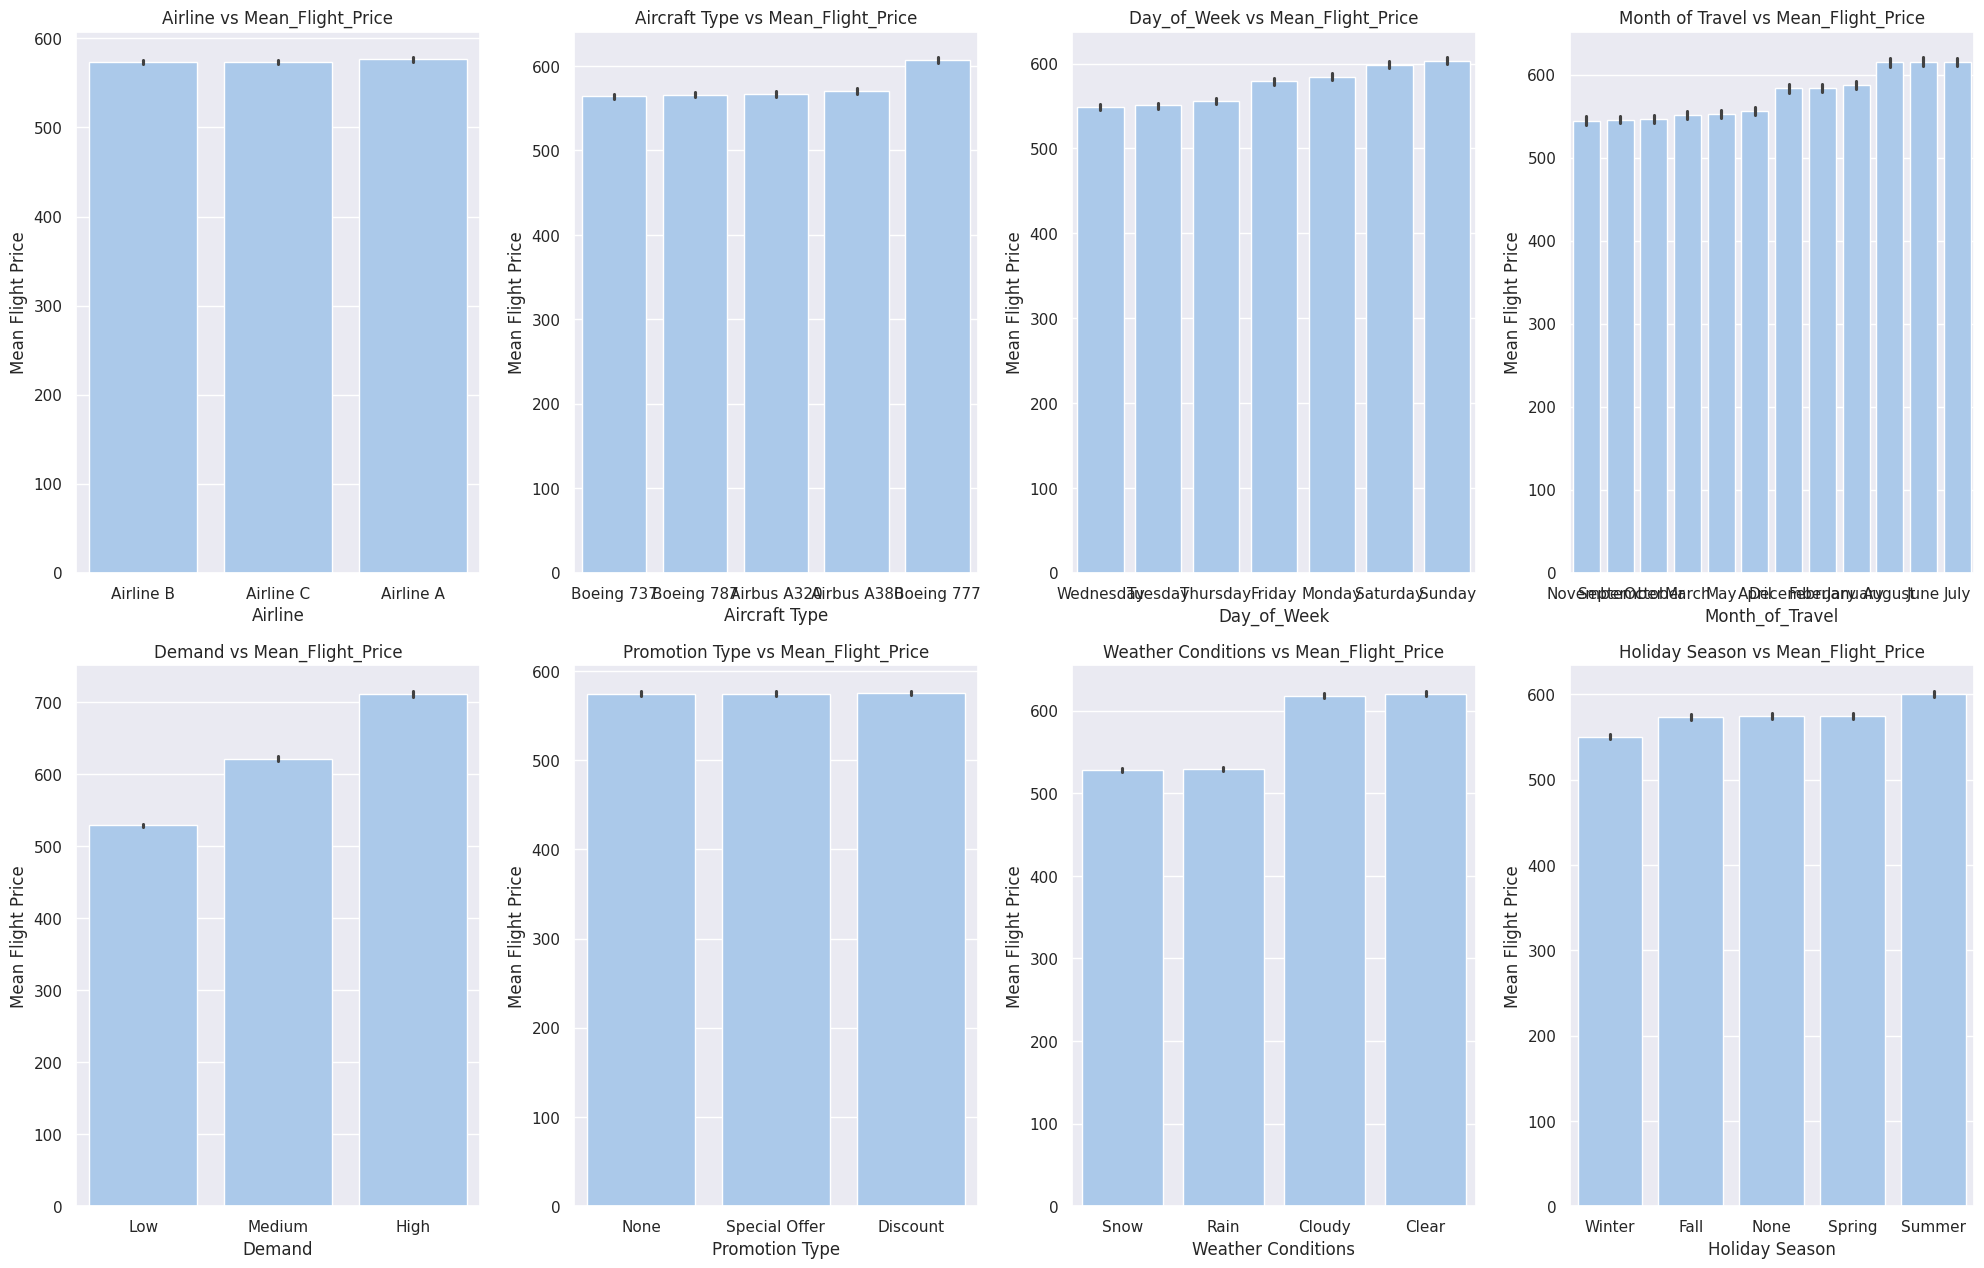

In [84]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(441)
sns.barplot(x=df['Airline'],y=df['Flight_Price'], order=airline_order)
plt.xlabel('Airline')
plt.ylabel('Mean Flight Price')
plt.title('Airline vs Mean_Flight_Price')

plt.subplot(442)
sns.barplot(x=df['Aircraft_Type'],y=df['Flight_Price'],order=aircraft_order)
plt.xlabel('Aircraft Type')
plt.ylabel('Mean Flight Price')
plt.title('Aircraft Type vs Mean_Flight_Price')

plt.subplot(443)
sns.barplot(x=df['Day_of_Week'],y=df['Flight_Price'],order=day_of_week_order)
plt.xlabel('Day_of_Week')
plt.ylabel('Mean Flight Price')
plt.title('Day_of_Week vs Mean_Flight_Price')

plt.subplot(444)
sns.barplot(x=df['Month_of_Travel'],y=df['Flight_Price'],order=month_of_travel_order)
plt.xlabel('Month_of_Travel')
plt.ylabel('Mean Flight Price')
plt.title('Month of Travel vs Mean_Flight_Price')

plt.subplot(445)
sns.barplot(x=df['Demand'],y=df['Flight_Price'],order=demand_order)
plt.xlabel('Demand')
plt.ylabel('Mean Flight Price')
plt.title('Demand vs Mean_Flight_Price')

plt.subplot(446)
sns.barplot(x=df['Promotion_Type'],y=df['Flight_Price'],order=promotion_type_order)
plt.xlabel('Promotion Type')
plt.ylabel('Mean Flight Price')
plt.title('Promotion Type vs Mean_Flight_Price')

plt.subplot(447)
sns.barplot(x=df['Weather_Conditions'],y=df['Flight_Price'],order=weather_conditions_order)
plt.xlabel('Weather Conditions')
plt.ylabel('Mean Flight Price')
plt.title('Weather Conditions vs Mean_Flight_Price')

plt.subplot(448)
sns.barplot(x=df['Holiday_Season'],y=df['Flight_Price'],order=holiday_season_order)
plt.xlabel('Holiday Season')
plt.ylabel('Mean Flight Price')
plt.title('Holiday Season vs Mean_Flight_Price')

plt.tight_layout()

Interpretations:
1. From the above Visualization we can understood that there is a linear relationship between the column "Day_of_Week","Month_of_Travel","Demand","Weather_Condtions","Holiday_Season".

2. There is no much difference in the columns "Airline","Aircraft_Type","Promotion_Type" all are equally distributed.So dropping those columns
3. So,we can give ordinal encoding for those columns which have linear relationship.




In [85]:
del df['Airline']
del df['Promotion_Type']
del df['Aircraft_Type']


plotting line plots for Numerical column vs flight price

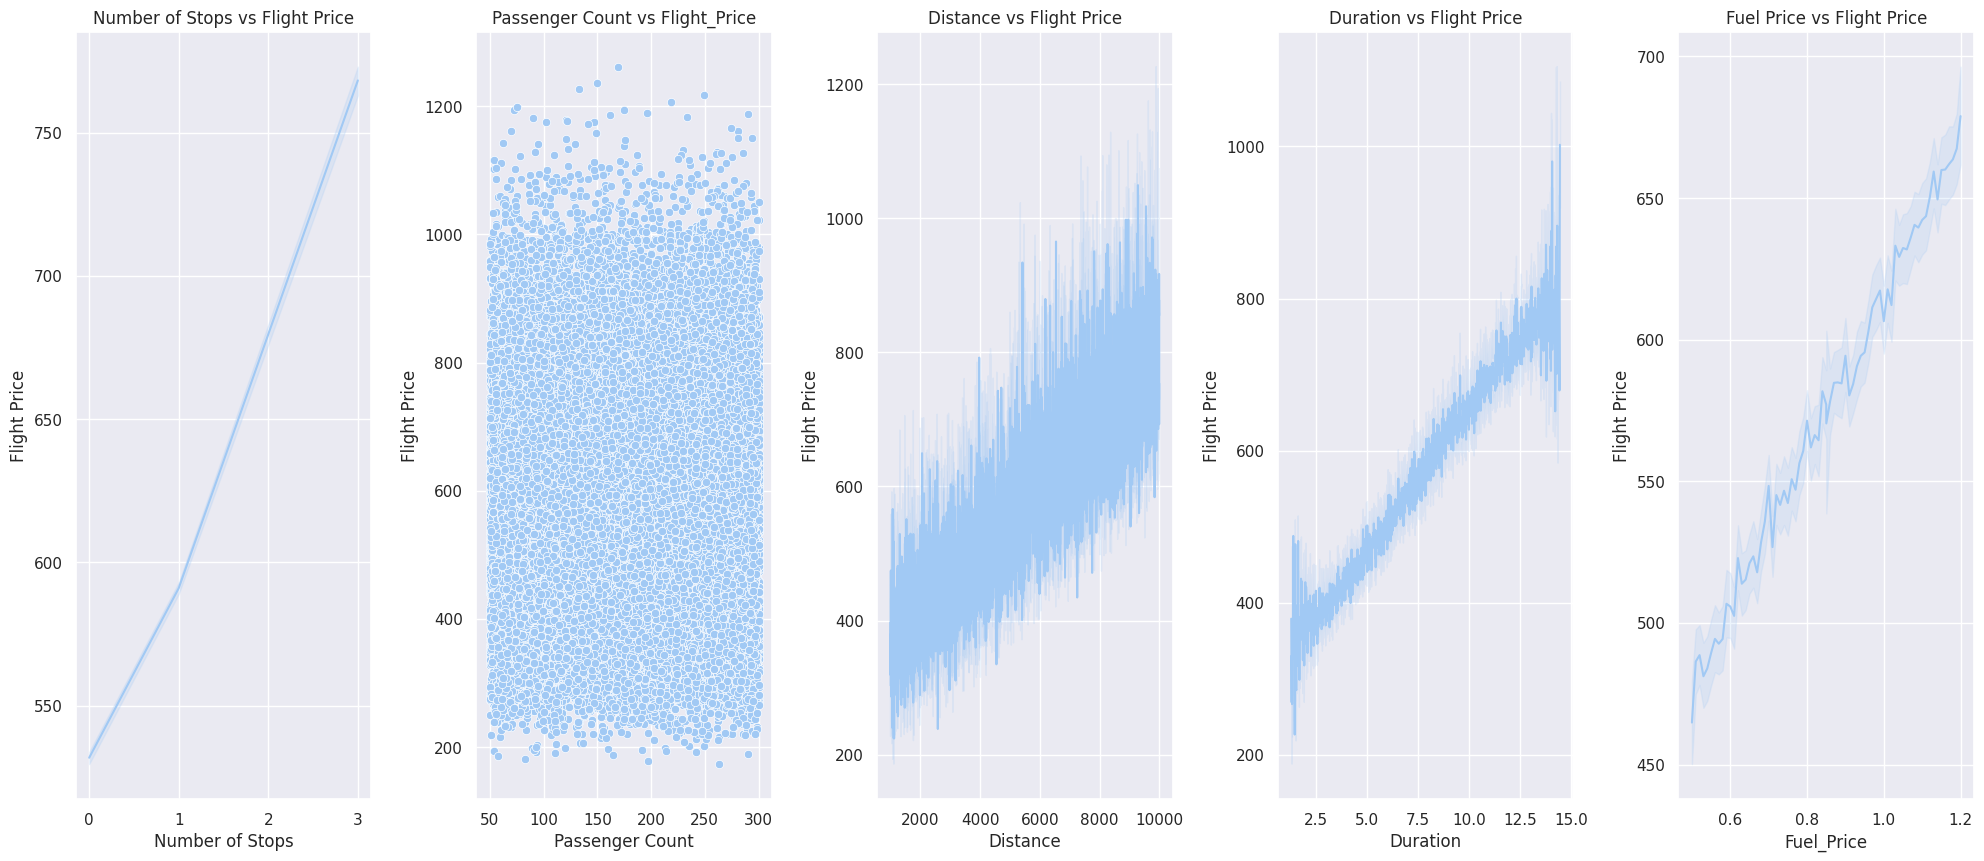

In [86]:
plt.figure(figsize=(20,25))

plt.subplot(351)
sns.lineplot(x=df['Number_of_Stops'],y=df['Flight_Price'])
plt.xlabel('Number of Stops')
plt.ylabel('Flight Price')
plt.title('Number of Stops vs Flight Price')

plt.subplot(352)
sns.scatterplot(x=df['Passenger_Count'],y=df['Flight_Price'])
plt.xlabel('Passenger Count')
plt.ylabel('Flight Price')
plt.title('Passenger Count vs Flight_Price')

plt.subplot(353)
sns.lineplot(x=df['Distance'],y=df['Flight_Price'])
plt.xlabel('Distance')
plt.ylabel('Flight Price')
plt.title("Distance vs Flight Price")

plt.subplot(354)
sns.lineplot(x=df['Duration'],y=df['Flight_Price'])
plt.xlabel('Duration')
plt.ylabel('Flight Price')
plt.title("Duration vs Flight Price")

plt.subplot(355)
sns.lineplot(x=df['Fuel_Price'],y=df['Flight_Price'])
plt.xlabel('Fuel_Price')
plt.ylabel('Flight Price')
plt.title("Fuel Price vs Flight Price")

plt.tight_layout()

Interpretations:
1. According to the column "Number_of_Stops" as the no of stops increases flight price increases.
2. According to the column "Distance" as the distance increases flight price increases.
3. According to the column "Duration" as the time duration increases flight price increases.
4. According to the column "Fuel_Price" as the rate of fuel price increases also the flight price increases.
5. From the above data visualization we can say that there is a clear  LINEAR relationship between the feature columns "Number_of_Stops","Distance","Duration","Fuel_Price" vs target column "Flight_Price".
6. According to the column "Passenger_Count" it is uniformly distributed so there is no such linear relationship with the  target column "Flight_Price".So dropping the column.


In [87]:
del df['Passenger_Count']

In [88]:
df.shape

(45000, 22)

Now there are 45000 rows and 23 columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Departure_City      45000 non-null  object 
 1   Arrival_City        45000 non-null  object 
 2   Distance            45000 non-null  float64
 3   Duration            45000 non-null  float64
 4   Number_of_Stops     45000 non-null  int64  
 5   Day_of_Week         45000 non-null  object 
 6   Month_of_Travel     45000 non-null  object 
 7   Holiday_Season      45000 non-null  object 
 8   Demand              45000 non-null  object 
 9   Weather_Conditions  45000 non-null  object 
 10  Fuel_Price          45000 non-null  float64
 11  Flight_Price        45000 non-null  float64
 12  Departure_Year      45000 non-null  int64  
 13  Departure_Month     45000 non-null  int64  
 14  Departure_Day       45000 non-null  int64  
 15  Departure_Hours     45000 non-null  int64  
 16  Depa

In [90]:
df.corr()

<ipython-input-90-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Distance,Duration,Number_of_Stops,Fuel_Price,Flight_Price,Departure_Year,Departure_Month,Departure_Day,Departure_Hours,Departure_Minute,Arrival_Year,Arrival_Month,Arrival_Day,Arrival_Hours,Arrival_Minute
Distance,1.000000,0.983633,0.176257,-0.006858,0.762812,NaN,NaN,NaN,0.007103,-0.000943,NaN,NaN,NaN,-0.007916,0.001931
Duration,0.983633,1.000000,0.173962,-0.006701,0.759924,NaN,NaN,NaN,0.007124,-0.000458,NaN,NaN,NaN,-0.008541,0.001446
Number_of_Stops,0.176257,0.173962,1.000000,-0.004579,0.341947,NaN,NaN,NaN,-0.004015,-0.004642,NaN,NaN,NaN,-0.001250,0.003245
Fuel_Price,-0.006858,-0.006701,-0.004579,1.000000,0.347470,NaN,NaN,NaN,-0.007735,0.007052,NaN,NaN,NaN,0.004190,0.000785
Flight_Price,0.762812,0.759924,0.341947,0.347470,1.000000,NaN,NaN,NaN,-0.000808,-0.000033,NaN,NaN,NaN,-0.005509,-0.000739
Departure_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure_Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure_Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure_Hours,0.007103,0.007124,-0.004015,-0.007735,-0.000808,NaN,NaN,NaN,1.000000,0.001922,NaN,NaN,NaN,-0.204914,-0.002485
Departure_Minute,-0.000943,-0.000458,-0.004642,0.007052,-0.000033,NaN,NaN,NaN,0.001922,1.000000,NaN,NaN,NaN,0.002758,-0.003553


1. The columns "Distance", "Duration", "Number of Stops", "Fuel Price" have a very good correlation values so there is a good linear relationship.
2. The columns "Passenger Count", "Departure_Hours", "Departure_Minute", "Arrival_Hours","Arrival_Minute" does not have a correlation value so there is a non linear relationship.




# Encoding Categorical Columns

In [91]:
len(pd.unique(df['Departure_City']))

23187

In [92]:
len(pd.unique(df['Arrival_City']))

23479

 The columns "Departure_City" and "Arrival_City" has more than 23000 unique values ,so we can try both label encoding and one hot encoding.

In [93]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
df['Month_of_Travel'] = label_encoding.fit_transform(df['Month_of_Travel'])
df['Weather_Conditions'] = label_encoding.fit_transform(df['Weather_Conditions'])
df['Holiday_Season'] = label_encoding.fit_transform(df['Holiday_Season'])
df['Day_of_Week'] = label_encoding.fit_transform(df['Day_of_Week'])
df['Demand'] = label_encoding.fit_transform(df['Demand'])
df['Departure_City'] = label_encoding.fit_transform(df['Departure_City'])
df['Arrival_City'] = label_encoding.fit_transform(df['Arrival_City'])

Tried one hot encoding for "Departure_City" and "Arrival_City" but getting error while applying ml model.

In [94]:
#One Hot Encoding
#df= pd.get_dummies(df,columns = ['Departure_City'])
#df = pd.get_dummies(df, columns = ['Arrival_City'])

In [95]:
df.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,...,Departure_Year,Departure_Month,Departure_Day,Departure_Hours,Departure_Minute,Arrival_Year,Arrival_Month,Arrival_Day,Arrival_Hours,Arrival_Minute
0,16378,5763,8286.0,11.94,0,6,2,3,1,2,...,2024,1,25,8,23,2024,1,25,20,19
1,9554,12751,2942.0,5.29,0,6,7,2,1,2,...,2024,1,25,20,28,2024,1,25,1,45
2,18756,15392,2468.0,4.41,1,3,11,3,0,1,...,2024,1,25,11,30,2024,1,25,15,54
3,1000,2425,3145.0,4.96,0,3,3,0,1,1,...,2024,1,25,20,24,2024,1,25,1,21
4,10526,14858,5558.0,8.09,1,4,4,1,1,0,...,2024,1,25,21,59,2024,1,25,6,4


In [96]:
df.shape

(45000, 22)

#Splitting the data into Input and Output data

In [97]:
X = df.drop('Flight_Price',axis = 1)
Y = df['Flight_Price']

In [98]:
X

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,...,Departure_Year,Departure_Month,Departure_Day,Departure_Hours,Departure_Minute,Arrival_Year,Arrival_Month,Arrival_Day,Arrival_Hours,Arrival_Minute
0,16378,5763,8286.0,11.94,0,6,2,3,1,2,...,2024,1,25,8,23,2024,1,25,20,19
1,9554,12751,2942.0,5.29,0,6,7,2,1,2,...,2024,1,25,20,28,2024,1,25,1,45
2,18756,15392,2468.0,4.41,1,3,11,3,0,1,...,2024,1,25,11,30,2024,1,25,15,54
3,1000,2425,3145.0,4.96,0,3,3,0,1,1,...,2024,1,25,20,24,2024,1,25,1,21
4,10526,14858,5558.0,8.09,1,4,4,1,1,0,...,2024,1,25,21,59,2024,1,25,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,15684,10277,3884.0,5.70,1,3,8,0,1,0,...,2024,1,25,21,49,2024,1,25,3,31
44996,4327,4739,9191.0,12.97,1,0,2,0,1,3,...,2024,1,25,22,50,2024,1,25,11,48
44997,10693,22226,6757.0,8.81,1,6,10,0,1,3,...,2024,1,25,2,33,2024,1,25,11,21
44998,20617,5406,3587.0,6.21,0,2,6,1,2,1,...,2024,1,25,13,25,2024,1,25,19,37


In [99]:
Y

0        643.93
1        423.13
2        442.17
3        394.42
4        804.35
          ...  
44995    417.18
44996    687.03
44997    547.39
44998    487.67
44999    532.92
Name: Flight_Price, Length: 45000, dtype: float64

In [100]:
#splitting into Training data and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 45)


In [101]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(36000, 21) (36000,) (9000, 21) (9000,)


#Implementing Linear Regression Model

In [102]:
from sklearn.linear_model import LinearRegression #importing
linear_regression_model = LinearRegression(fit_intercept = True)#initialising
linear_regression_model.fit(X_train,Y_train)#fitting
print(linear_regression_model.predict(X_test))#predicting
print(Y_test)

[570.07136948 401.68599278 576.15530768 ... 727.49472734 385.11153637
 669.86098896]
37345    498.86
15429    415.36
2849     547.20
3906     729.73
24544    295.20
          ...  
26208    414.94
9469     369.64
10886    759.45
6917     444.03
22271    658.47
Name: Flight_Price, Length: 9000, dtype: float64


In [103]:
linear_regression_model.score(X_test,Y_test)

0.8526400247622086

In [104]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_regression_model=cross_val_score(linear_regression_model,X_train,Y_train,cv=10).mean()
cross_val_linear_regression_model

0.8566489171661784

# K NEAREST NEIGHBOR Regression

#Choosing the best k value

In [106]:
from sklearn.neighbors import KNeighborsRegressor#import
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,30)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,Y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,Y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,Y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,Y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.8236946304522522
K value :  2  train score :  0.9569829622465408 cross_val_score :  0.8820065055371625
K value :  3  train score :  0.9491794522763967 cross_val_score :  0.9009395940509661
K value :  4  train score :  0.9459088129450264 cross_val_score :  0.9098400539354448
K value :  5  train score :  0.943787202511878 cross_val_score :  0.9149822470328264
K value :  6  train score :  0.9422731262012285 cross_val_score :  0.9187757258799392
K value :  7  train score :  0.9416141744264256 cross_val_score :  0.9206184392941203
K value :  8  train score :  0.94079636138449 cross_val_score :  0.922019288535882
K value :  9  train score :  0.9399682054381105 cross_val_score :  0.9228248430374654
K value :  10  train score :  0.9391269950216942 cross_val_score :  0.9234587144939145
K value :  11  train score :  0.9384525829461956 cross_val_score :  0.9234841614895734
K value :  12  train score :  0.9374608869367667 cross_val_score :  0.9

In [115]:
cross_val_knn_regressor=max(cross_val_knn)

In [116]:
print("The best K-Value is 13 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 13 and Cross_val_score is 0.9236009424650697


#Implementing K Nearest Neighbor Regression

In [117]:
knn_regressor=KNeighborsRegressor(n_neighbors=14)
knn_regressor.fit(X_train_scaled,Y_train)


KNeighborsRegressor(n_neighbors=14)

In [118]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,Y_train,cv=15).mean()
cross_val_knn_regressor

0.9238373793091224

# Decision Tree Regression

#Choosing the best of Depth Value

In [119]:
from sklearn.tree import DecisionTreeRegressor
max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,Y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,Y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,Y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,Y_train,cv = 10).mean())



Depth :  1  train Score  :  0.44816821664337403 cross_val_score :  0.4477791593886947
Depth :  2  train Score  :  0.5848859486077558 cross_val_score :  0.5845013290813778
Depth :  3  train Score  :  0.695337849305953 cross_val_score :  0.6938401529929499
Depth :  4  train Score  :  0.7841511002597839 cross_val_score :  0.7824009533963106
Depth :  5  train Score  :  0.841860278586733 cross_val_score :  0.8390660305757613
Depth :  6  train Score  :  0.8769689964098183 cross_val_score :  0.8713333593132306
Depth :  7  train Score  :  0.9047515856417016 cross_val_score :  0.8978940825758815
Depth :  8  train Score  :  0.9266560377220963 cross_val_score :  0.9178154316843751
Depth :  9  train Score  :  0.9451958275464301 cross_val_score :  0.9343146383493822
Depth :  10  train Score  :  0.9603136100541294 cross_val_score :  0.946059337567114
Depth :  11  train Score  :  0.9723484558747518 cross_val_score :  0.9527731553017658
Depth :  12  train Score  :  0.9816638303606176 cross_val_score :

In [120]:
cross_validation_decision_tree_regressor = max(cross_val_dt)

In [121]:
print("The best depth is 13 and Cross_val_score is:",cross_validation_decision_tree_regressor)

The best depth is 13 and Cross_val_score is: 0.9566068720403809


#Implementing Decision Tree Regression

In [122]:
decision_tree_regressor=DecisionTreeRegressor(max_depth=14, random_state=0)
decision_tree_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [123]:
cross_val_decision_tree_regressor=cross_val_score(dt_regressor,X_train,Y_train,cv=10).mean()
cross_val_decision_tree_regressor

0.9525765074509431

In [124]:
feature_Importance = list(zip(decision_tree_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(feature_Importance, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
2,0.556786,Distance
8,0.188480,Demand
10,0.124002,Fuel_Price
3,0.044964,Duration
4,0.043721,Number_of_Stops
6,0.023563,Month_of_Travel
5,0.012194,Day_of_Week
0,0.001230,Departure_City
20,0.001179,Arrival_Hours
15,0.000946,Departure_Hours


#Random Forest

#Choosing the best of Depth value

In [125]:
from sklearn.ensemble import RandomForestRegressor
max_depth=np.array([2,4,8,10,12,14,16,18,20])
cross_val_random_forest=[]
for d in max_depth:
  random_forest_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  random_forest_regressor.fit(X_train,Y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(random_forest_regressor,X_train,Y_train,cv = 10).mean())
  cross_val_random_forest.append(cross_val_score(random_forest_regressor,X_train,Y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.6035044153516026
Depth :  4 cross_val_score :  0.8004352801511614
Depth :  8 cross_val_score :  0.9409471397715246
Depth :  10 cross_val_score :  0.9659264128947426
Depth :  12 cross_val_score :  0.9759320180098147
Depth :  14 cross_val_score :  0.9784796421445552
Depth :  16 cross_val_score :  0.9789668716573807
Depth :  18 cross_val_score :  0.9790683428669633
Depth :  20 cross_val_score :  0.979074126916086


In [128]:
cross_val_random_forest_regressor=max(cross_val_random_forest)

In [129]:
print("The best depth is 20 and Cross_val_score is:",cross_val_random_forest_regressor)

The best depth is 20 and Cross_val_score is: 0.979074126916086


#Implementing Random Forest Regression

In [130]:
random_forest_regressor=RandomForestRegressor(max_depth=20, random_state=0)
random_forest_regressor.fit(X_train,Y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [131]:
cross_val_random_forest_regressor=cross_val_score(random_forest_regressor,X_train,Y_train,cv=10).mean()
cross_val_random_forest_regressor

0.979074126916086

#Extreme Gradient Boosting Regression

#Choosing the best learning rate

In [132]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.05,0.08,0.1,0.2,0.25]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,Y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,Y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,Y_train,cv = 15).mean())

Learning rate :  0.05 cross_val_score: 0.9875827141510847
Learning rate :  0.08 cross_val_score: 0.9907678858487817
Learning rate :  0.1 cross_val_score: 0.991044873954186
Learning rate :  0.2 cross_val_score: 0.9904246136535427
Learning rate :  0.25 cross_val_score: 0.9901042562095775


In [133]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [134]:
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.1 and Cross_val_score is: 0.991044873954186


#Implementing Extreme Gradient Boosing Regression

In [135]:
xgb_regressor =  xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,Y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [136]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,Y_train,cv=15).mean()
cross_val_xgb_regressor

0.991044873954186

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,random_state = 42)
gbr.fit(X_train, Y_train)
print(gbr.score(X_train, Y_train))
print(gbr.score(X_test, Y_test))

0.9869849005042076
0.9873707993227011


#Cross Validation Score for all Machine Learning Models

In [137]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_regression_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_decision_tree_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_random_forest_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.8566489171661784
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9238373793091224
Cross Validation Score for Decision Tree Regression Model:  0.9525765074509431
Cross Validation Score for Random Forest Regression Model:  0.979074126916086
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.991044873954186


#R2 Score for Machine Learning Models

In [138]:
from sklearn.metrics import r2_score
Y_predicted_linear_regression = linear_regression_model.predict(X_test)
Y_predicted_k_nearest_neighbor = knn_regressor.predict(X_test)
Y_predicted_decision_tree =  dt_regressor.predict(X_test)
Y_predicted_random_forest = random_forest_regressor.predict(X_test)
Y_predicted_xtreme_gradient_boosting = xgb_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [139]:
R2_score_linear_regression = r2_score(Y_test,Y_predicted_linear_regression)
R2_score_k_nearest_neighbor = r2_score(Y_test,Y_predicted_k_nearest_neighbor)
R2_score_decision_tree = r2_score(Y_test,Y_predicted_decision_tree)
R2_score_random_forest = r2_score(Y_test,Y_predicted_random_forest)
R2_score_xtreme_gradient_boosting = r2_score(Y_test,Y_predicted_xtreme_gradient_boosting)

In [140]:
print("R2 Score for Linear Regression Model:",R2_score_linear_regression)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_k_nearest_neighbor)
print("R2 Score for Decision Tree Regression Model: ",R2_score_decision_tree)
print("R2 Score for Random Forest Regression Model: ",R2_score_random_forest)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xtreme_gradient_boosting)

R2 Score for Linear Regression Model: 0.8526400247622086
R2 Score for K-Nearest Neighbors Regression Model: -0.958127571040988
R2 Score for Decision Tree Regression Model:  0.9557924907567007
R2 Score for Random Forest Regression Model:  0.9807897855794887
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9921655068549196


# **ROOT MEAN SQUARED ERROR (RMSE)**

In [141]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test,Y_predicted_xtreme_gradient_boosting))
print("Root Mean Squared Error (RMSE):",rmse)

Root Mean Squared Error (RMSE): 14.199564483013974


#Feature Importance

In [143]:
xgb_regressor.feature_importances_

array([3.1751196e-04, 2.5522799e-04, 3.4139314e-01, 2.1812679e-01,
       6.7133382e-02, 2.1074340e-02, 2.0564290e-02, 2.6133675e-03,
       2.0214939e-01, 1.6312784e-02, 1.0902468e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.2306913e-04, 2.5358051e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.9167612e-04,
       2.6682226e-04], dtype=float32)

In [144]:
df.columns

Index(['Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Fuel_Price', 'Flight_Price',
       'Departure_Year', 'Departure_Month', 'Departure_Day', 'Departure_Hours',
       'Departure_Minute', 'Arrival_Year', 'Arrival_Month', 'Arrival_Day',
       'Arrival_Hours', 'Arrival_Minute'],
      dtype='object')

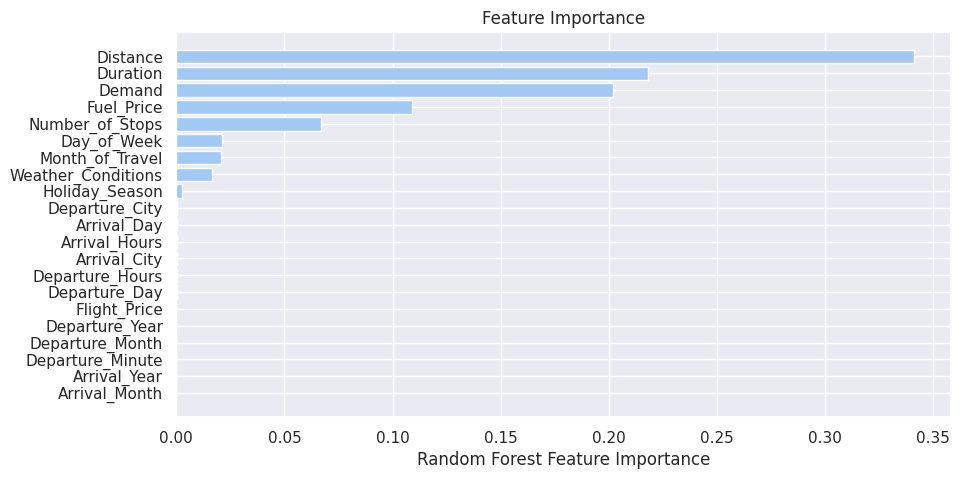

In [145]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

# **TEST DATASET**

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.shape

(5000, 18)

In [7]:
test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [8]:
test.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           5000 non-null   object 
 1   Airline             4573 non-null   object 
 2   Departure_City      4961 non-null   object 
 3   Arrival_City        4970 non-null   object 
 4   Distance            4991 non-null   float64
 5   Departure_Time      5000 non-null   object 
 6   Arrival_Time        5000 non-null   object 
 7   Duration            5000 non-null   float64
 8   Aircraft_Type       4992 non-null   object 
 9   Number_of_Stops     5000 non-null   int64  
 10  Day_of_Week         4975 non-null   object 
 11  Month_of_Travel     4966 non-null   object 
 12  Holiday_Season      5000 non-null   object 
 13  Demand              4966 non-null   object 
 14  Weather_Conditions  4951 non-null   object 
 15  Passenger_Count     5000 non-null   int64  
 16  Promot

# **Checking and Handling Missing Values**

In [10]:
test.isnull().sum()

Flight_ID               0
Airline               427
Departure_City         39
Arrival_City           30
Distance                9
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           8
Number_of_Stops         0
Day_of_Week            25
Month_of_Travel        34
Holiday_Season          0
Demand                 34
Weather_Conditions     49
Passenger_Count         0
Promotion_Type         49
Fuel_Price             10
dtype: int64

In [11]:
print(st.mode(test['Airline']))
print(st.mode(test['Departure_City']))
print(st.mode(test['Arrival_City']))
print(st.mode(test['Aircraft_Type']))
print(st.mode(test['Day_of_Week']))
print(st.mode(test['Month_of_Travel']))
print(st.mode(test['Demand']))
print(st.mode(test['Weather_Conditions']))
print(st.mode(test['Promotion_Type']))

Airline A
nan
nan
Boeing 737
Sunday
October
Low
Clear
Special Offer


In [12]:
test['Departure_City'].value_counts()

Lake Michael        9
Smithmouth          7
Matthewmouth        7
Port Michael        7
Port Michelle       7
                   ..
New Mollyside       1
Christinaberg       1
South Taylorport    1
Hebertfort          1
Perrymouth          1
Name: Departure_City, Length: 4273, dtype: int64

In [13]:
test['Arrival_City'].value_counts()

Lake David          8
West Robert         7
North Michael       6
Jennifermouth       5
Port David          5
                   ..
Davidhaven          1
West Jenna          1
North Dennisview    1
East Robertport     1
West Deborah        1
Name: Arrival_City, Length: 4285, dtype: int64

# **Imputing Null Values for Categorical Column Using Mode**

In [14]:
test = test.fillna({"Airline":st.mode(test['Airline'])})
test['Departure_City'] = test['Departure_City'].fillna("Lake Michael")
test['Arrival_City'] = test['Arrival_City'].fillna("Lake David ")
test = test.fillna({"Aircraft_Type":st.mode(test['Aircraft_Type'])})
test = test.fillna({"Day_of_Week":st.mode(test['Day_of_Week'])})
test = test.fillna({"Month_of_Travel":st.mode(test['Month_of_Travel'])})
test = test.fillna({"Demand":st.mode(test['Demand'])})
test = test.fillna({"Weather_Conditions":st.mode(test['Weather_Conditions'])})
test = test.fillna({"Promotion_Type":st.mode(test['Promotion_Type'])})

In [15]:
test.isnull().sum()

Flight_ID              0
Airline                0
Departure_City         0
Arrival_City           0
Distance               9
Departure_Time         0
Arrival_Time           0
Duration               0
Aircraft_Type          0
Number_of_Stops        0
Day_of_Week            0
Month_of_Travel        0
Holiday_Season         0
Demand                 0
Weather_Conditions     0
Passenger_Count        0
Promotion_Type         0
Fuel_Price            10
dtype: int64

## **Detecting Outliers**

In [16]:
test.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price
count,4991.000000,5000.000000,5000.000000,5000.000000,4990.000000
mean,5460.673212,7.830462,0.667600,174.941200,0.851327
std,2615.795947,3.319984,0.740554,72.901245,0.203235
min,1000.000000,1.280000,0.000000,50.000000,0.500000
25%,3204.500000,4.970000,0.000000,111.000000,0.680000
50%,5487.000000,7.820000,1.000000,177.000000,0.850000
75%,7739.000000,10.650000,1.000000,238.000000,1.030000
max,10000.000000,14.480000,3.000000,300.000000,1.200000


As per the data description there is no outliers in the column "Distance" and "Fuel_Price" so we can impute mean value for both the columns.

In [17]:
print(test['Distance'].mean())
print(test['Fuel_Price'].mean())

5460.673211781206
0.8513266533066131


In [18]:
test['Distance'] = test['Distance'].fillna(test['Distance'].mean())
test['Fuel_Price'] = test['Fuel_Price'].fillna(test['Fuel_Price'].mean())

In [19]:
test.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

So there is no missing values all the missing values were treated using Mode for categorical columns and mean for numerical columns.

# **DataType Correction**

In [20]:
test.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
dtype: object

Column "Departure_Time" and "Arrival_Time" is given as object have to convert to datetime.

In [21]:
test['Departure_Time'] = pd.to_datetime(test['Departure_Time'])
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'])

In [22]:
test.dtypes

Flight_ID                     object
Airline                       object
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type                 object
Number_of_Stops                int64
Day_of_Week                   object
Month_of_Travel               object
Holiday_Season                object
Demand                        object
Weather_Conditions            object
Passenger_Count                int64
Promotion_Type                object
Fuel_Price                   float64
dtype: object

Column "Departure_Time" and "Arrival_Time" is converted from object to datetime.
Now All columns are in the right format of datatype.

Here the "Departure_Time" and "Arrival_Time" column is going to split into 10 columns by Hour,Minute,Year,Month,Day

In [23]:
test['Departure_Year'] = test['Departure_Time'].dt.year
test['Departure_Month'] = test['Departure_Time'].dt.month
test['Departure_Day'] = test['Departure_Time'].dt.day
test['Departure_Hours'] = test['Departure_Time'].dt.hour
test['Departure_Minute'] = test['Departure_Time'].dt.minute
test['Arrival_Year'] = test['Arrival_Time'].dt.year
test['Arrival_Month'] = test['Arrival_Time'].dt.month
test['Arrival_Day'] = test['Arrival_Time'].dt.day
test['Arrival_Hours'] = test['Arrival_Time'].dt.hour
test['Arrival_Minute'] = test['Arrival_Time'].dt.minute

Deleting the columns "Departure_Time" and "Arrival_Time" as the 2 columns splitted into 10 columns

In [24]:
del test['Departure_Time']
del test['Arrival_Time']

In [25]:
test .columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Duration', 'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Holiday_Season', 'Demand', 'Weather_Conditions',
       'Passenger_Count', 'Promotion_Type', 'Fuel_Price', 'Departure_Year',
       'Departure_Month', 'Departure_Day', 'Departure_Hours',
       'Departure_Minute', 'Arrival_Year', 'Arrival_Month', 'Arrival_Day',
       'Arrival_Hours', 'Arrival_Minute'],
      dtype='object')

In [26]:
test.shape

(5000, 26)

# **Checking for Duplicates**

In [27]:
test = test.drop_duplicates()

In [28]:
test .shape

(5000, 26)

There is no Duplicate in the given data

In [29]:
# column "Flight_ID" is not mandatory column so we can drop or delete the column
del test['Flight_ID']

In [30]:
test.shape

(5000, 25)

So there are 5000 rows and 25 columns as of now

Deleting the columns "Airline","Promotion_Type","Aircraft_Type","Passenger_Count" as it is not that much important column

In [31]:
del test['Airline']
del test['Promotion_Type']
del test['Aircraft_Type']
del test['Passenger_Count']

# Encoding Categorical Columns

In [32]:
len(pd.unique(test['Departure_City']))


4273

In [33]:
len(pd.unique(test['Arrival_City']))

4286

The columns "Departure_City" and "Arrival_City" has more than 4000 unique values ,so we can try both label encoding and one hot encoding.

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
test['Month_of_Travel'] = label_encoding.fit_transform(test['Month_of_Travel'])
test['Weather_Conditions'] = label_encoding.fit_transform(test['Weather_Conditions'])
test['Holiday_Season'] = label_encoding.fit_transform(test['Holiday_Season'])
test['Day_of_Week'] = label_encoding.fit_transform(test['Day_of_Week'])
test['Demand'] = label_encoding.fit_transform(test['Demand'])
test['Departure_City'] = label_encoding.fit_transform(test['Departure_City'])
test['Arrival_City'] = label_encoding.fit_transform(test['Arrival_City'])

Tried one hot encoding for "Departure_City" and "Arrival_City" but getting error while applying ml model.



In [35]:
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,...,Departure_Year,Departure_Month,Departure_Day,Departure_Hours,Departure_Minute,Arrival_Year,Arrival_Month,Arrival_Day,Arrival_Hours,Arrival_Minute
0,490,2073,3096.0,5.52,1,2,1,3,2,0,...,2024,1,25,18,43,2024,1,25,0,14
1,1795,302,8760.0,11.80,1,4,0,1,0,0,...,2024,1,25,1,16,2024,1,25,13,4
2,2180,4148,6365.0,9.59,1,3,4,1,1,2,...,2024,1,25,12,17,2024,1,25,21,52
3,3201,1364,7836.0,10.21,0,4,7,1,1,2,...,2024,1,25,0,11,2024,1,25,10,23
4,3791,2084,1129.0,1.86,1,2,1,3,0,1,...,2024,1,25,3,22,2024,1,25,5,13


In [36]:
test.shape

(5000, 21)

#Extreme Gradient Boosting Regression

In [105]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=Y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=test, enable_categorical=True)



In [107]:
# Assuming you already have dtrain and dtest defined from previous steps
# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}
# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)
# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()
# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)
# Make predictions on the test set
Y_predicted_xtreme_gradient_boosting = xgb_reg.predict(dtest)

In [108]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [109]:
Y_predicted_xtreme_gradient_boosting_1=np.vectorize(custom_round)(Y_predicted_xtreme_gradient_boosting)


In [110]:
Y_predicted_xtreme_gradient_boosting_1

array([632.13, 927.99, 563.86, ..., 344.07, 729.96, 560.73])

In [111]:
submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':Y_predicted_xtreme_gradient_boosting})

In [112]:
print(len(Y_predicted_xtreme_gradient_boosting))
print(len(submission))

5000
5000


In [113]:
Predicted_flight_price.to_csv('Submission.csv', index = False)

In [114]:
Submission = pd.read_csv('Submission.csv')
Submission


,Flight_ID,Flight_Price
0,F45001,632.13257
1,F45002,927.98860
2,F45003,563.85736
3,F45004,551.84480
4,F45005,646.06380
...,...,...
4995,F49996,786.55695
4996,F49997,537.04816
4997,F49998,344.07346
4998,F49999,729.96100


#Suggestions

1. Suggestions to passengers:Book flights well in advance to secure better deals and availability. This can help you avoid last-minute price hikes.
2. Suggestions to Airlines:During Holiday Season Airline can give offers and discounts.